In [12]:
import os
from openai import OpenAI
from dotenv import load_dotenv
import base64

# from utils import take_photo

# Import for image display
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
load_dotenv()

XAI_API_KEY = os.getenv("XAI_API_KEY")

client = OpenAI(
    api_key=XAI_API_KEY,
    base_url="https://api.x.ai/v1",
)



In [14]:

# Take a photo and get the image path
# image_path = take_photo()

# #print the photo taken
# img = Image.open(image_path)
# plt.figure(figsize=(3,3))
# plt.imshow(img)
# plt.axis('off')
# plt.show()


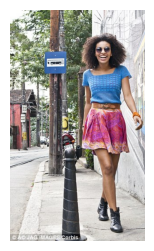

In [15]:
image_path = "../images/style.jpg"


# Open and display the image
img = Image.open(image_path)
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")
    return encoded_string

In [17]:
# Getting the base64 string

base64_image = encode_image(image_path)

In [18]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                    "detail": "high",
                },
            },
            {
                "type": "text",
                "text": """
                Rank this person out of 100 for their style based on the following categories: accessories, style type, style score, shoes, color coordination, and overall appearance. You must provide a number between 0 and 100. Answer in the following JSON format: 
                {
                    "accessories": 0,
                    "style type": "type of style",
                    "style score": 0,
                    "shoes": 0,
                    "color coordination": 0,
                    "overall appearance": 0,
                    "potential style score": 0,
                }
                """,
            },
        ],
    },
]

In [19]:
stream = client.chat.completions.create(
    model="grok-vision-beta",
    messages=messages,
    stream=True,
    temperature=0.01,
)

In [20]:
for chunk in stream:
    print(chunk.choices[0].delta.content, end="", flush=True)

```json
{
    "accessories": 70,
    "style type": "bohemian",
    "style score": 75,
    "shoes": 65,
    "color coordination": 80,
    "overall appearance": 78,
    "potential style score": 73
}
```None

In [21]:
data = {
  "hair": 65,
  "skin": 70,
  "eyes": 75,
  "teeth": 70,
  "overall appearance": 70,
  "age": 25
}

